# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 15.2 MB 4.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [160]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from random import randint

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [136]:
pd.options.display.float_format = '{:,.2f}'.format

#random color
color = []
for i in range(50):
    color.append('#%06X' % randint(0, 0xFFFFFF))

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(len(df_hh_income))
print(len(df_pct_poverty))
print(len(df_pct_completed_hs))
print(len(df_share_race_city))
print(len(df_fatalities))

29322
29329
29329
29268
2535


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [6]:
df_hh_income = df_hh_income.drop_duplicates()
df_pct_poverty = df_pct_poverty.drop_duplicates()
df_pct_completed_hs = df_pct_completed_hs.drop_duplicates()
df_share_race_city = df_share_race_city.drop_duplicates()
df_fatalities = df_fatalities.drop_duplicates()

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [7]:
#Amend data typr and replace '-' to n/a
df_pct_poverty.poverty_rate.replace('-', np.nan, regex=True, inplace=True)

#Convert object to float64
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

In [8]:
# df_pct_poverty.head()
poverty_rate =df_pct_poverty.groupby(['Geographic Area'])['poverty_rate'].mean() \
.sort_values(ascending=[False]) \
.rename_axis('Geographic Area').reset_index(name='counts') #mean group by, #order by #change the name

In [9]:
v_bar = px.bar(
        x = poverty_rate['Geographic Area'],
        y = poverty_rate.counts,
        color = poverty_rate['Geographic Area'], #color by group : cat_men_women.sex
        color_continuous_scale='Aggrnyl',
        title='Poverty Rate in each US State')

v_bar.update_layout(xaxis_title='US State', 
                    coloraxis_showscale=False,
                    yaxis_title='Poverty Rate')
v_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [10]:
#Amend data typr and replace '-' to n/a
df_pct_completed_hs.percent_completed_hs.replace('-', np.nan, regex=True, inplace=True)

#Convert object to float64
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [11]:
# df_pct_poverty.head()
hs_rate =df_pct_completed_hs.groupby(['Geographic Area'])['percent_completed_hs'].mean() \
.sort_values(ascending=[False]) \
.rename_axis('Geographic Area').reset_index(name='counts') 

In [12]:
v_bar = px.bar(
        x = poverty_rate['Geographic Area'],
        y = poverty_rate.counts,
        color = poverty_rate['Geographic Area'], #color by group : cat_men_women.sex
        color_continuous_scale='Aggrnyl',
        title='High School Graduation Rate by US State')

v_bar.update_layout(xaxis_title='US State', 
                    coloraxis_showscale=False,
                    yaxis_title='High School Graduation Rate')
v_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [13]:
#merge two tables into one.
df_pr_hs = pd.merge(poverty_rate,hs_rate,on=['Geographic Area'],how='outer')
df_pr_hs=df_pr_hs.rename(columns={'counts_x': 'pv_rate', 'counts_y': 'hs_rate'})

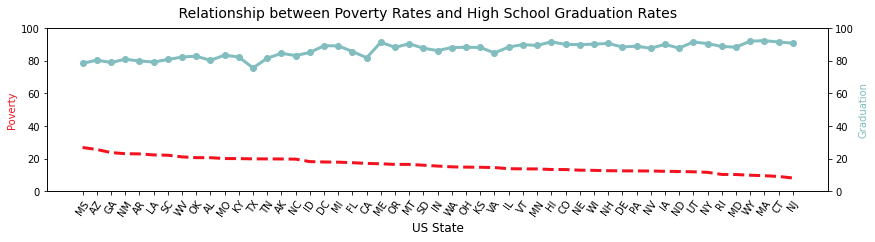

In [145]:
plt.figure(figsize=(14,3))
plt.suptitle(' Relationship between Poverty Rates and High School Graduation Rates', fontsize=14)
plt.xlabel('US State', fontsize=12)
plt.xticks(fontsize=10, rotation=55)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Poverty', color=color[0]) # can use a HEX code
ax2.set_ylabel('Graduation', color=color[1]) # or a named colour
 
ax1.plot(df_pr_hs['Geographic Area'], df_pr_hs.pv_rate, color=color[0], linewidth=3, linestyle='--')
ax2.plot(df_pr_hs['Geographic Area'], df_pr_hs.hs_rate, color=color[1], linewidth=3, marker='o')

a,b = 0, 100
ax1.set_ylim(a,b)
ax2.set_ylim(a,b)


plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

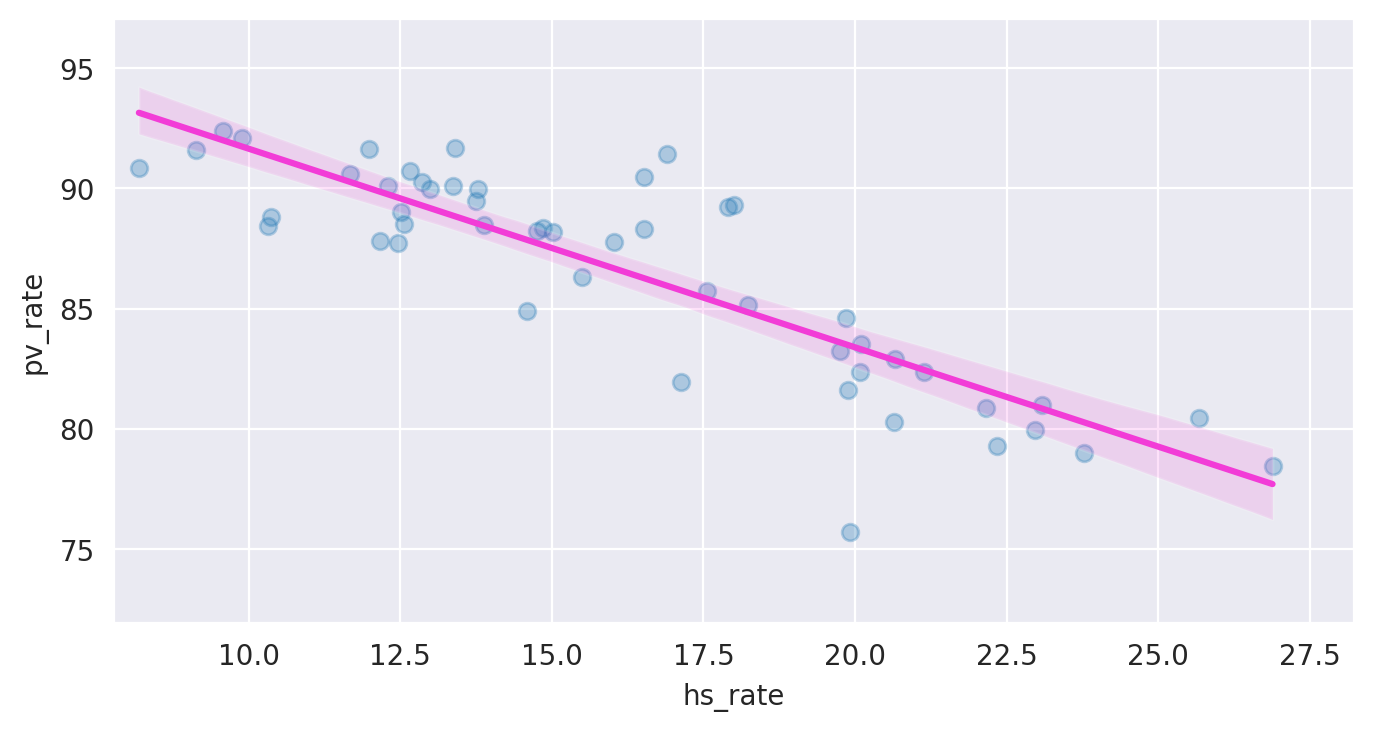

In [147]:
#Scatter plot 
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=df_pr_hs,
                   x='pv_rate',
                   y='hs_rate',
                  #  hue='Geographic Area',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': color[2]})
  
  #set limitation
  a, b = df_pr_hs.pv_rate.min()*0.95, df_pr_hs.pv_rate.max()*1.05
  c, d = df_pr_hs.hs_rate.min()*0.95, df_pr_hs.hs_rate.max()*1.05

  ax.set(xlim=(a, b),
         ylim=(c, d),
         ylabel='pv_rate',
         xlabel='hs_rate')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

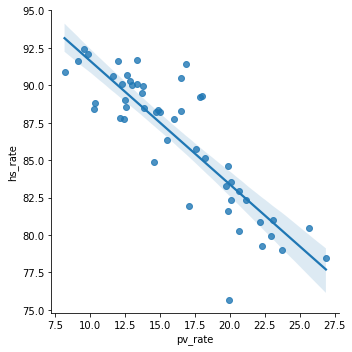

In [149]:
sns.lmplot(x='pv_rate', y='hs_rate', data=df_pr_hs )
plt.show()

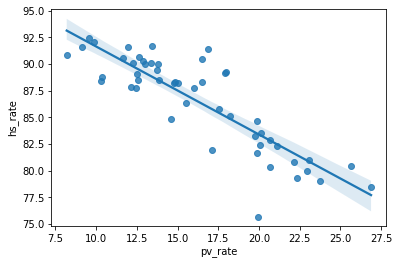

In [17]:
sns.regplot(x='pv_rate', y='hs_rate', data=df_pr_hs )
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

We do not have the number populatoin of the city,  hence it is hard to get the accurate answer. 

In [18]:
#Amend data typr and replace '-' to n/a
for i in range(2,7):
  df_share_race_city.iloc[:,i].replace('(X)', np.nan, regex=True, inplace=True)
  df_share_race_city.iloc[:,i]  = pd.to_numeric(df_share_race_city.iloc[:,i])


In [19]:
df_race_graph = df_share_race_city.groupby(['Geographic area']).agg(['mean'])

In [20]:
#Method 1: Unpivot table
g_ = df_race_graph.unstack().reset_index(name='value')
g_.drop(columns=['level_1'], inplace=True)

In [21]:
v_bar = px.bar(
        x = g_['Geographic area'],
        y = g_.value,
        color = g_.level_0, #color by group : cat_men_women.sex
        color_continuous_scale='Aggrnyl',
        title='Bar Chart with Subsections Showing the Racial Makeup of Each US State')

v_bar.update_layout(xaxis_title='US State',
                    coloraxis_showscale=False,
                    yaxis_title='% of People')
v_bar.show()

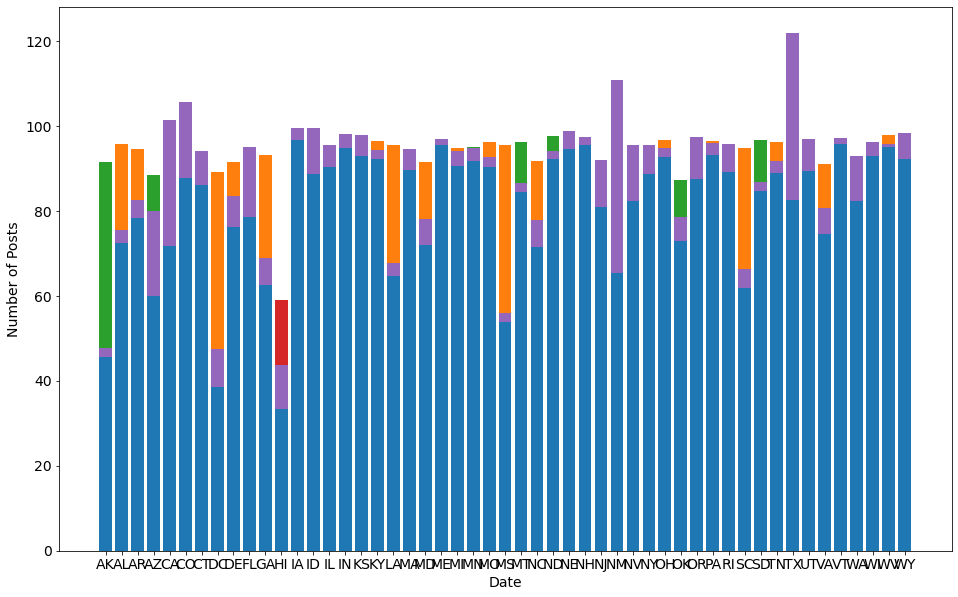

In [22]:
#Method 2: loop 

plt.figure(figsize=(16,10)) # make chart larger	
plt.xticks(fontsize=14)	
plt.yticks(fontsize=14)	
plt.xlabel('Date', fontsize=14)	
plt.ylabel('Number of Posts', fontsize=14)	

plt.bar(df_race_graph.index, df_race_graph.iloc[:,0])
for i in range(1,5):
  plt.bar(df_race_graph.index, df_race_graph.iloc[:,i], bottom=df_race_graph.iloc[:,0])


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [23]:
df_dount = df_fatalities.race.value_counts()

In [24]:
fig = px.pie(labels=df_dount.index, 
             values=df_dount.values,
             title="Donut Chart by of People Killed by Race",
             color_discrete_sequence=px.colors.sequential.RdBu,
            #  color_discrete_sequence=px.colors.sequential.Plasma_r,
             names=df_dount.index,
             hole=0.6, # makes a donut chart =) 
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')


fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [25]:
df_sex = df_fatalities.gender.value_counts()

In [26]:
fig = px.pie(labels=df_sex.index, 
             values=df_sex.values,
             title="Comparing the Total Number of Deaths of Men and Women",
            #  color_discrete_sequence=px.colors.sequential.RdBu,
            #  color_discrete_sequence=px.colors.sequential.Plasma_r,
             color_discrete_sequence=px.colors.sequential.Viridis,
             names=df_sex.index,
             hole=0.1, # makes a donut chart =) 
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')


fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

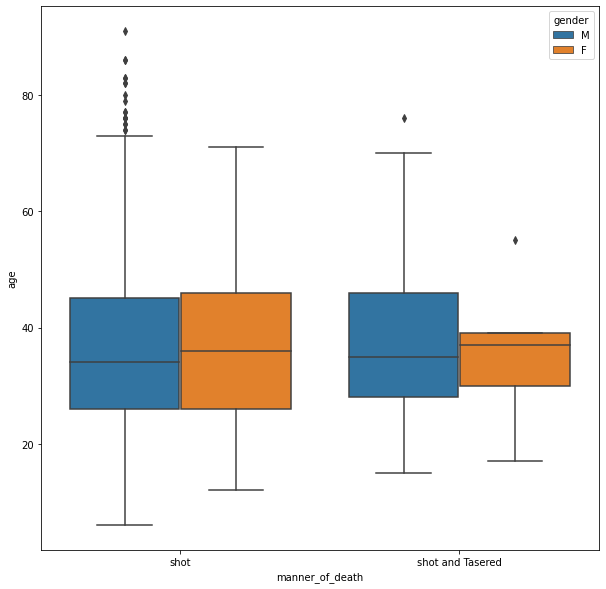

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_fatalities,
            x='manner_of_death', 
            y='age', 
            hue='gender'
            )
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [28]:
df_fatalities.loc[df_fatalities['armed'] == 'unarmed', 'armed_group'] = 'unarmed'  
df_fatalities.loc[df_fatalities['armed'] != 'unarmed', 'armed_group'] = 'armed'  
df_fatalities.loc[df_fatalities['armed'] == 'undetermined', 'armed_group'] = 'undetermined'  


In [29]:
df_fatalities.armed_group.value_counts()

armed           2247
unarmed          171
undetermined     117
Name: armed_group, dtype: int64

In [30]:
armed_group_ = df_fatalities.groupby(['armed_group', 'armed'])['id'].count().rename_axis(['armed_group', 'armed']).reset_index(name='counts')

In [31]:
burst = px.sunburst(armed_group_, 
                    path=['armed_group', 'armed'], 
                    values='counts',
                    title='Were People Armed?',
                   )

burst.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [32]:
under = df_fatalities.loc[df_fatalities['age'] < 25].id.count()
total = df_fatalities.id.count()

print(f"{round((under /total) * 100,2)}% of people killed were under 25 years old.")

17.75% of people killed were under 25 years old.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

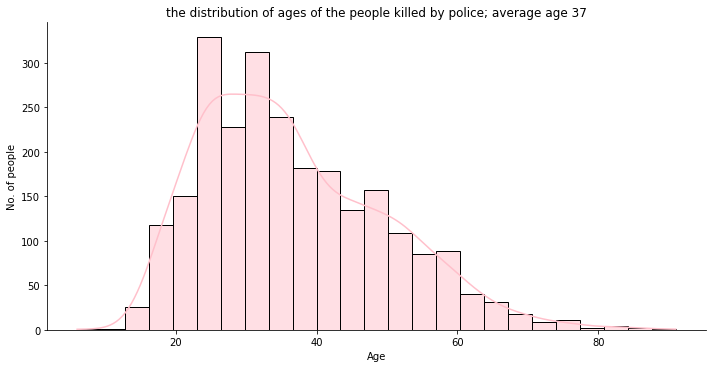

In [33]:
aver_age = "{:.0f}".format(df_fatalities['age'].mean())
sns.displot(data=df_fatalities, 
            bins=25,  
            x="age", 
            aspect=2,
            kde=True, 
            color='pink')

# df_fatalities['age'].mean()
plt.title(f'the distribution of ages of the people killed by police; average age {aver_age}')
plt.xlabel('Age')
plt.ylabel('No. of people')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

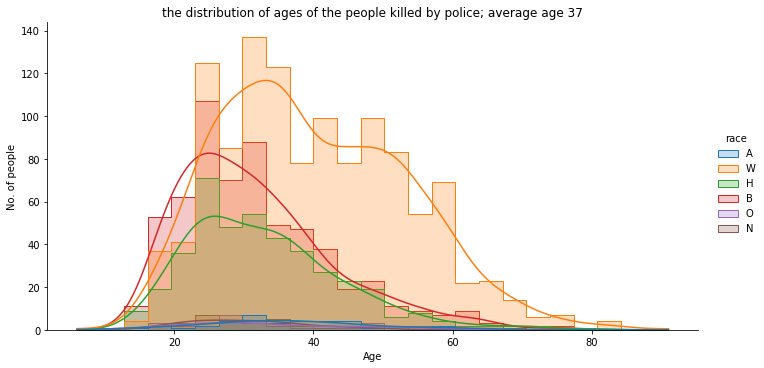

In [34]:
aver_age = "{:.0f}".format(df_fatalities['age'].mean())
sns.displot(data=df_fatalities, 
            bins=25,  
            x="age", 
            aspect=2,
            kde=True, 
            hue='race', 
            element='step')

# df_fatalities['age'].mean()
plt.title(f'the distribution of ages of the people killed by police; average age {aver_age}')
plt.xlabel('Age')
plt.ylabel('No. of people')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

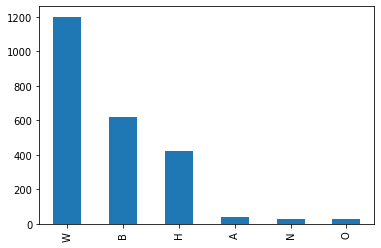

In [35]:
df_fatalities.race.value_counts().plot(kind='bar')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

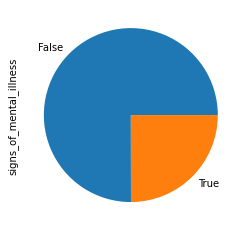

In [36]:
df_fatalities.signs_of_mental_illness.value_counts().plot(kind='pie')

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

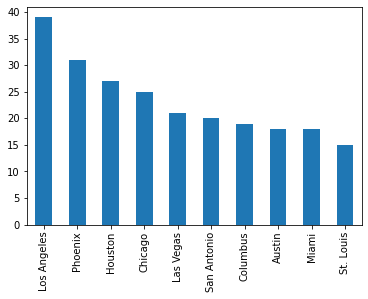

In [37]:
top10_ = df_fatalities.city.value_counts().head(10)
top10_.plot(kind='bar')

In [38]:
top10_

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [133]:
top10_full_=df_fatalities[df_fatalities.city.isin(top10_.index)]


In [101]:
top = top10_full_.groupby(['city', 'race'])['id'].count().rename_axis(['city', 'race']).reset_index(name='counts')

In [106]:
top = top.sort_values(['city', 'counts'], ascending=False)

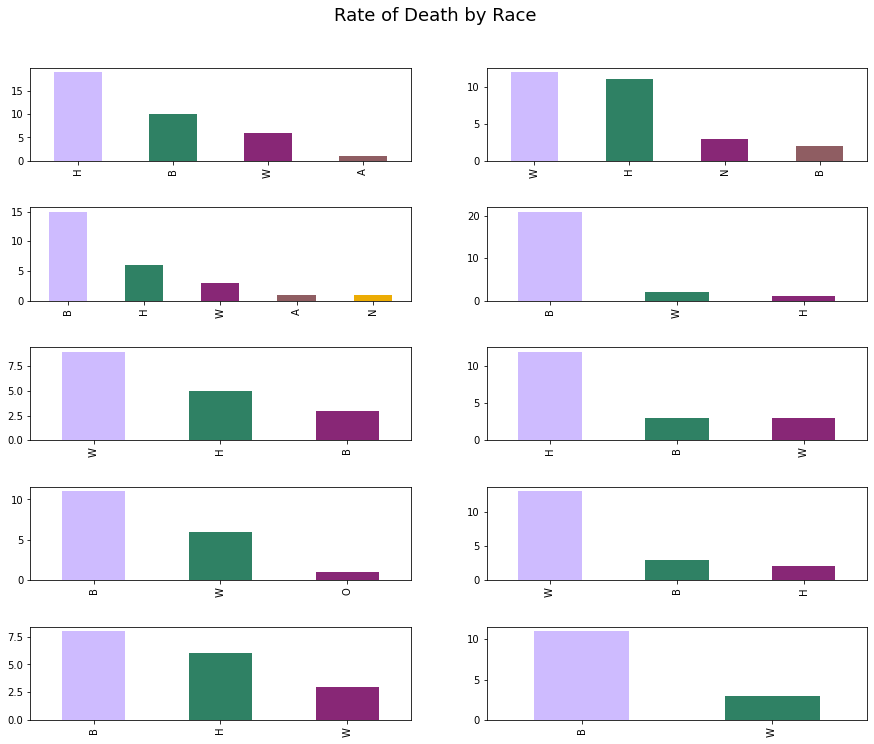

In [135]:
# define subplot grid
nrow=5
ncol=2
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Rate of Death by Race", fontsize=18, y=0.95)

# loop through tickers and axes
for city, ax in zip(top10_.index, axs.ravel()):
    # filter df for ticker and plot on specified axes
    top[top["city"] == city].plot(ax=ax ,x = 'race' ,y='counts' ,kind='bar' ,color = color)
    ax.get_legend().remove()
    ax.set_xlabel("")
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
kills_ = df_fatalities.groupby('state').size().sort_values(ascending=False).rename_axis(['state']).reset_index(name='counts')
kills_

In [169]:
fig = go.Figure(data=go.Choropleth(
    locations=kills_.state, # Spatial coordinates
    z = kills_.counts, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Police Killings",
))

fig.update_layout(
    title_text = 'Police Killings by US State',
    geo_scope='usa', # limite map scope to USA
)
fig.show()
# fig.show("png")

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [180]:
#fix the date. 
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities['date_m'] = df_fatalities['date'].dt.to_period('m')


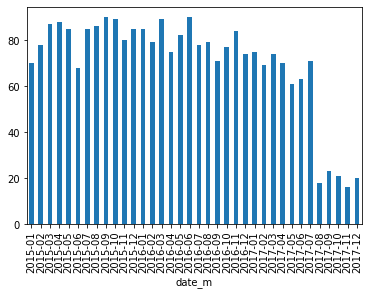

In [186]:
df_fatalities.groupby('date_m').size().plot(kind= 'bar')

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).